In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv, matplotlib
from scipy.optimize import curve_fit
from scipy.stats import linregress
from read_dat import read_dat
from scipy.signal import find_peaks
import uncertainties as un
from matplotlib import colors
import time
%matplotlib widget
matplotlib.rcParams.update({
    'figure.figsize': (13,9),
    'font.size': 18
})

start = -30
long = 1000
short = 75
baseline = 200
names = ['']


dat_file = read_dat(f'PTB_SP120_250.dat', align_method='CFD', t_start=start, t_long=long, t_short=short, baseline_samples=baseline)


init complete


In [3]:
t0 = time.time()
dat_file.lst_out_geometric_mean(events=10000, ch=[0,1], output=[[1,1,0,0,0], [1,1,0,0,0]], out_geo=[1,1,0,0,1], tof=True, tof_ch=2, tof_time_between=300)
t1 = time.time()

print(f'Time taken: {t1-t0}')


/home/mkidson/gitRepos/dDAQ_dev/radical_changes/event.py:152: RuntimeWarning: invalid value encountered in scalar divide
  S_geo = np.sum(geometric_mean_trace[int(self.istart):int(self.ishort)]) / L_geo


1000 events
2000 events
3000 events
4000 events
5000 events
5000 events
6000 events
7000 events
8000 events
9000 events
9000 events
9000 events
10000 events
End reading
Time taken: 28.877891540527344


['PTB_SP120_250 geometric mean, False events, cuts False']
['L [ch]', 'S[ch]', 'pulse height [bits]']


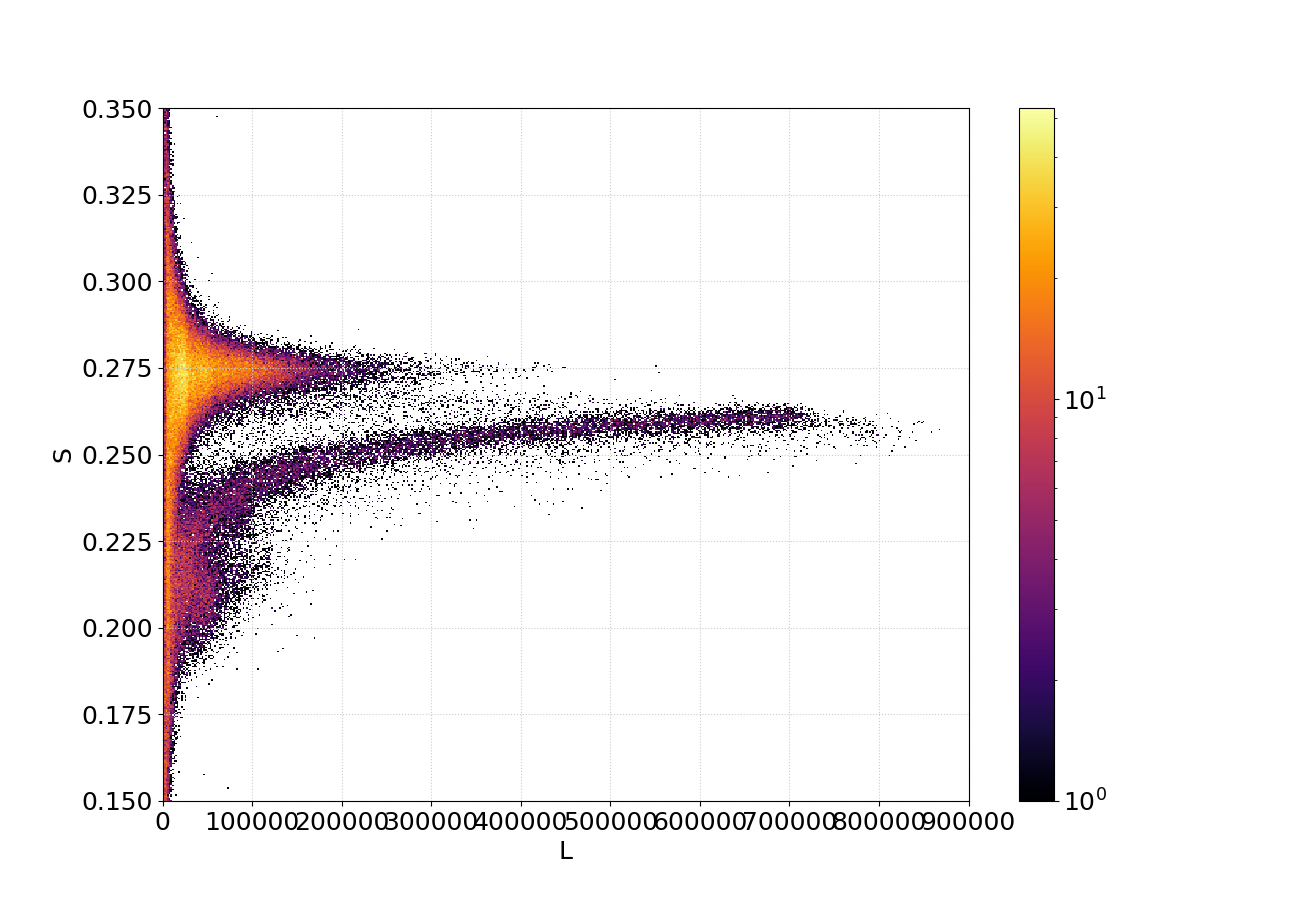

In [2]:
file = open(f'./PTB_SP120_250_params_geo_mean.csv', 'r')

reader = csv.reader(file)

head = next(reader, None)
print(head)
head = next(reader, None)
print(head)

L = []
S = []
tof = []

for row in reader:
    L.append(float(row[0]))
    S.append(float(row[1]))
    tof.append(float(row[2]))

file.close()

L = np.array(L)
S = np.array(S)
tof = np.array(tof)

plt.figure()

plt.hist2d(L, S, bins=[512,512], cmap='inferno', norm=colors.LogNorm(vmin=1), range=((0, 900000), (0.15, 0.35)))

plt.xlabel('L')
plt.ylabel('S')

plt.title(f'')
plt.grid(color='#CCCCCC', linestyle=':')
plt.colorbar()
plt.show()

In [3]:
# dat_file.add_selections(L, S, mode='m', lims=((0, 900000), (0.15, 0.35)))
dat_file.add_selections(mode='p', file='PTB_SP120_250_cuts.csv')

Selections Imported
Polygons Created


In [ ]:
dat_file.reinitialise_file()
dat_file.lst_out(events=False, ch=[0], output=[[1,1,0,0,1]], tof=True, tof_ch=1, tof_time_between=450, cuts=[0], inc=[1], filename='junk_neutrons.csv')


1000 events
2000 events
3000 events
4000 events
5000 events
6000 events
7000 events
8000 events
9000 events
10000 events
11000 events
12000 events
13000 events
14000 events
15000 events
16000 events
17000 events
18000 events
19000 events
20000 events
21000 events
21000 events
22000 events
23000 events
24000 events
25000 events
26000 events
27000 events
27000 events
28000 events
29000 events
30000 events
30000 events
31000 events
32000 events
33000 events
34000 events
35000 events
36000 events
37000 events
37000 events
38000 events
39000 events
40000 events
41000 events
42000 events
43000 events
44000 events
45000 events
46000 events
47000 events
48000 events
49000 events
50000 events
51000 events
52000 events
53000 events
54000 events
55000 events
56000 events
57000 events
58000 events
59000 events
60000 events
61000 events
61000 events
62000 events
63000 events
64000 events
64000 events
65000 events
66000 events
67000 events
68000 events
69000 events
70000 events
71000 events
72000 ev

['junk channel 0, False events, cuts [0]']
['L [ch]', 'S[ch]', 'pulse height [bits]']


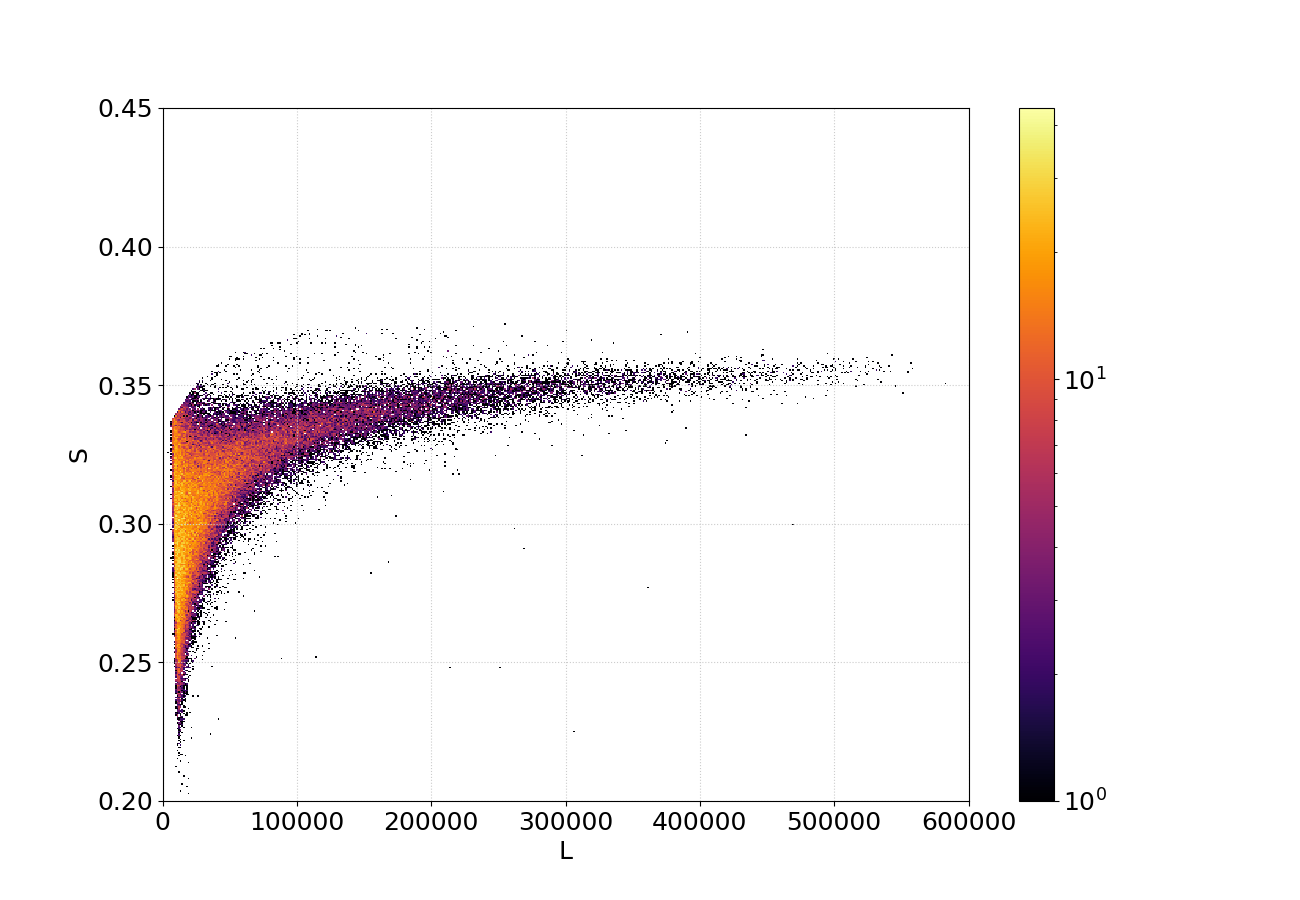

In [3]:
file = open(f'./junk_neutrons.csv', 'r')

reader = csv.reader(file)

head = next(reader, None)
print(head)
head = next(reader, None)
print(head)

L_neutron = []
S_neutron = []
tof_neutron = []

for row in reader:
    L_neutron.append(float(row[0]))
    S_neutron.append(float(row[1]))
    tof_neutron.append(float(row[2]))

file.close()

L_neutron = np.array(L_neutron)
S_neutron = np.array(S_neutron)
tof_neutron = np.array(tof_neutron)

plt.figure()

plt.hist2d(L_neutron, S_neutron, bins=[512,512], cmap='inferno', norm=colors.LogNorm(vmin=1), range=((0, 600000), (0.2, 0.45)))

plt.xlabel('L')
plt.ylabel('S')

plt.title(f'')
plt.grid(color='#CCCCCC', linestyle=':')
plt.colorbar()
plt.show()

In [24]:
def gaussian(x, mu, sigma, A):
    return (A*(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1/2)*((x-mu)/sigma)**2))

In [4]:
L_neutrons, S_neutrons, mask = dat_file.select_events(L, S, cut_id=[0], inc=[1])

In [5]:
tof_neutrons = tof[mask]

In [7]:
polygons = dat_file.get_polygons()

In [8]:
neutrons_L = L[polygons[0].contains_points(np.transpose([L, S]))]
neutrons_S = S[polygons[0].contains_points(np.transpose([L, S]))]
neutrons_tof = tof[polygons[0].contains_points(np.transpose([L, S]))]

In [16]:
contains_arr = polygons[0].contains_points(np.transpose([L, S]))

gammas_L = L[[not i for i in contains_arr]]
gammas_S = S[[not i for i in contains_arr]]
gammas_tof = tof[[not i for i in contains_arr]]

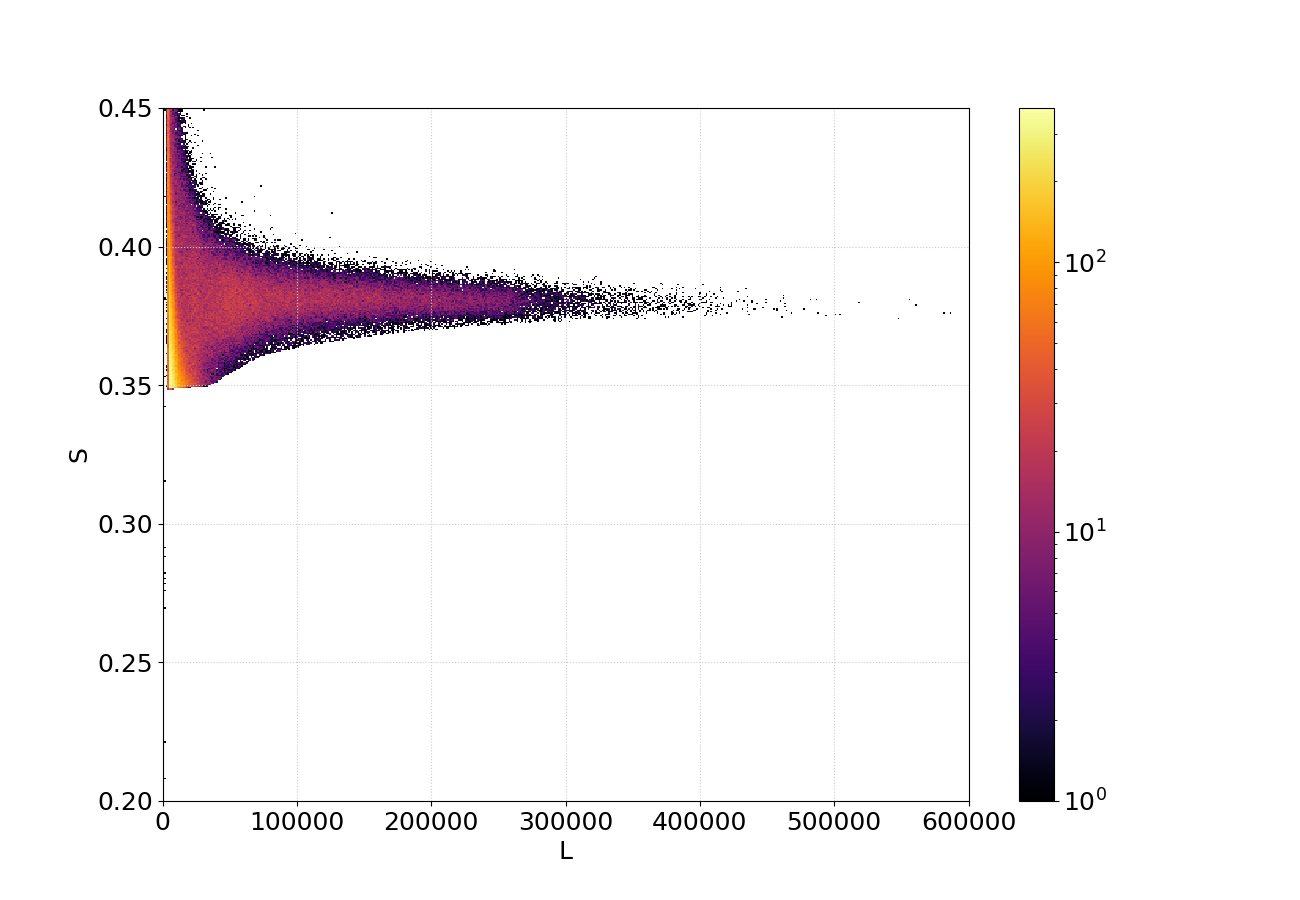

In [11]:
plt.figure()

plt.hist2d(neutrons_L, neutrons_S, bins=[512,512], cmap='inferno', norm=colors.LogNorm(vmin=1), range=((0, 600000), (0.2, 0.45)))

plt.xlabel('L')
plt.ylabel('S')

plt.title(f'')
plt.grid(color='#CCCCCC', linestyle=':')
plt.colorbar()
plt.show()

In [47]:
gamma_peak = 1053
gamma_t = 3.34
dist_to_target = 1

tof_shifted = neutrons_tof - (gamma_peak + gamma_t)
tof_shifted_flipped = tof_shifted * -1

v = dist_to_target / (tof_shifted_flipped * 1e-9)
c = 299792458

m_neutron = 939.565

E_neutron = m_neutron * ( ( 1 / (np.sqrt( 1 - ((v**2) / (c**2)) ) ) ) - 1 )


beta = (v**2) / (c**2)



tof_hist_neutron = np.histogram(tof_shifted_flipped, bins='auto', range=(0, 250))


/tmp/ipykernel_440167/2098529052.py:13: RuntimeWarning: invalid value encountered in sqrt
  E_neutron = m_neutron * ( ( 1 / (np.sqrt( 1 - ((v**2) / (c**2)) ) ) ) - 1 )


In [51]:

E_neutron_hist = np.histogram(E_neutron, bins='sqrt', range=(0, 20))

# tof_hist = np.histogram(tof[L>50000], bins='auto', range=(1047, 1067))

In [22]:
neutrons_tof_hist = np.histogram(neutrons_tof, bins='auto')
gammas_tof_hist = np.histogram(gammas_tof, bins='sqrt', range=(1510, 1530))


In [32]:
gamma_fit = curve_fit(gaussian, gammas_tof_hist[1][:-1][gammas_tof_hist[0] > 500], gammas_tof_hist[0][gammas_tof_hist[0] > 500]-500, [1520, 10, 1])

In [38]:
print(2.35*gamma_fit[0][1])

1.4312262824224744


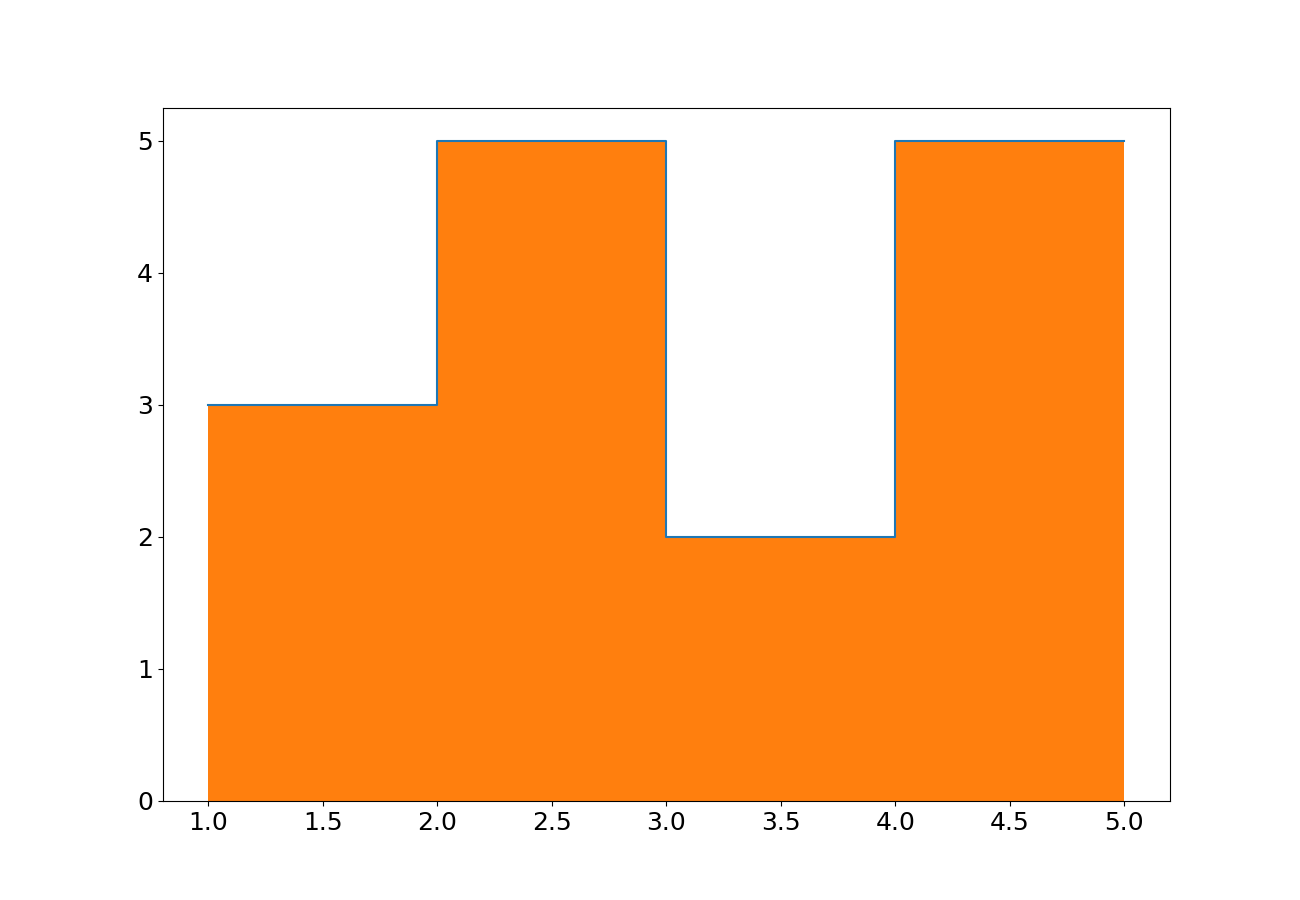

In [69]:
a = [1,1,1,2,2,2,2,2,3,3,4,4,4,4,5]
b = 4

a_hist = np.histogram(a, bins=b)

plt.figure()

plt.step(a_hist[1], np.concatenate((a_hist[0], [a_hist[0][-1]])), where='post')
plt.hist(a, bins=b)

plt.show()

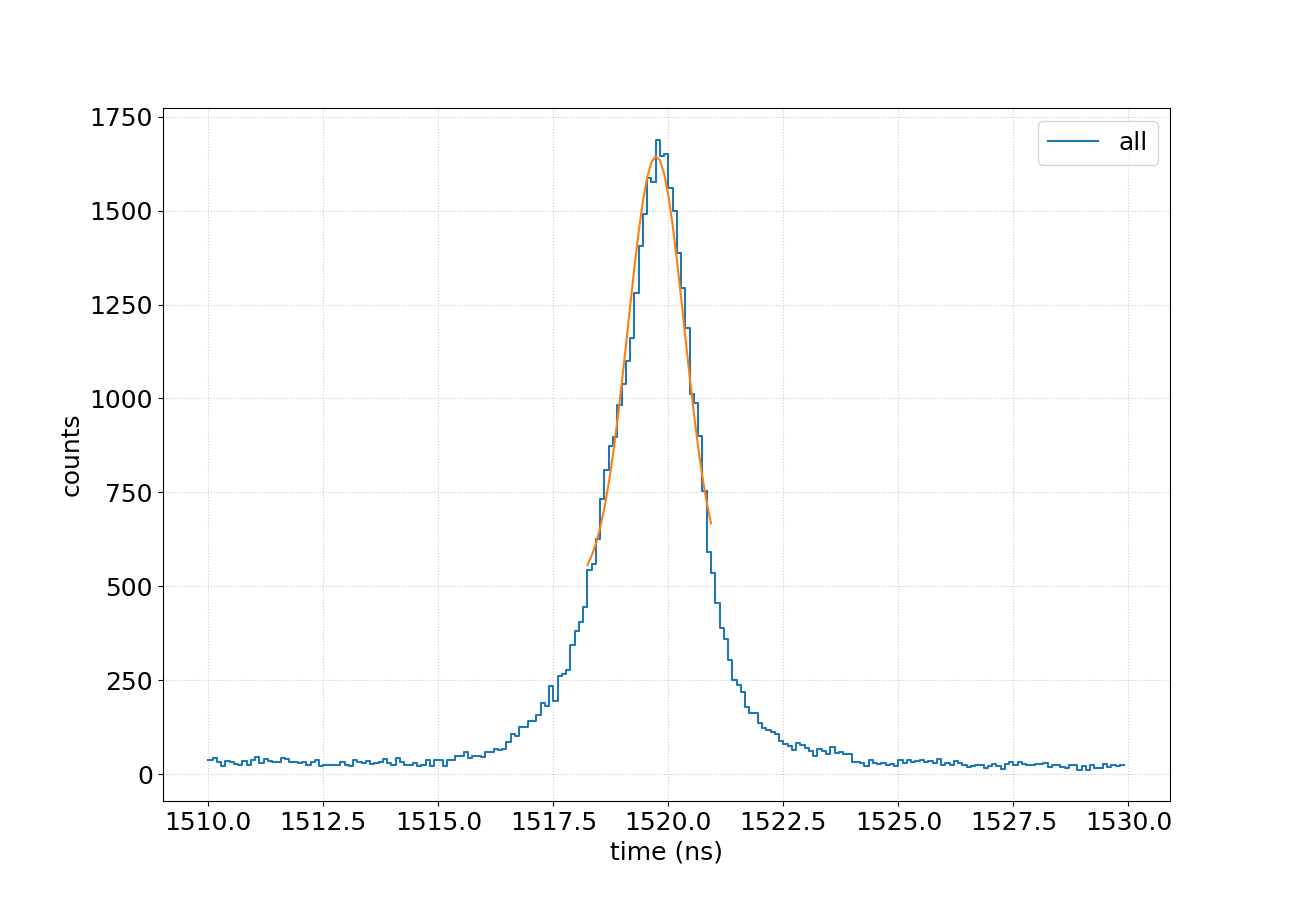

In [37]:
plt.figure()

plt.step(gammas_tof_hist[1][:-1], gammas_tof_hist[0], label='all', where='post')
plt.plot(gammas_tof_hist[1][:-1][gammas_tof_hist[0] > 500], gaussian(gammas_tof_hist[1][:-1][gammas_tof_hist[0] > 500], *gamma_fit[0])+500)

plt.xlabel('time (ns)')
plt.ylabel('counts')
# plt.yscale('log')

plt.title('')
plt.legend()
plt.grid(color='#CCCCCC', linestyle=':')
#plt.savefig()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


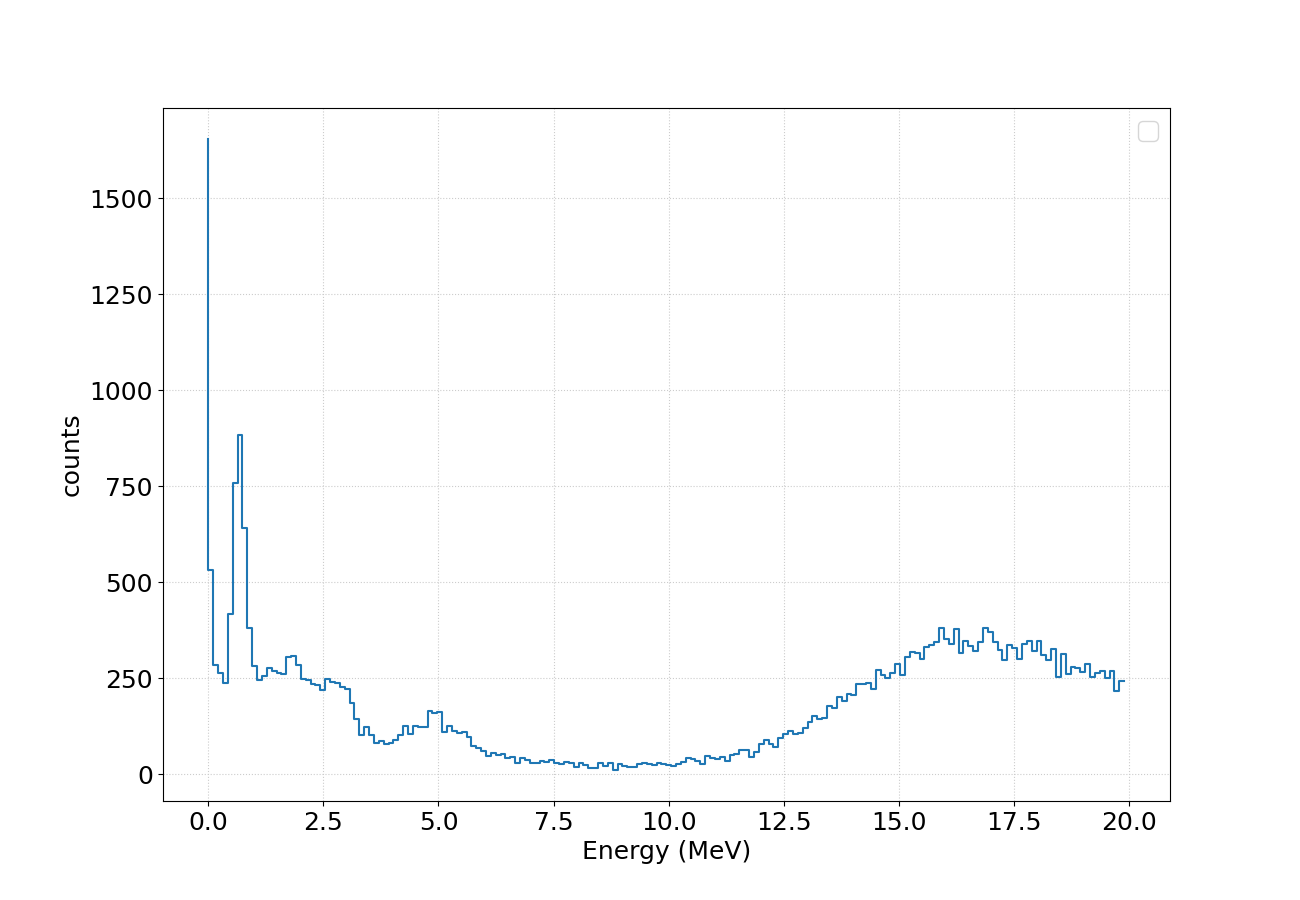

In [54]:

plt.figure()

# plt.step(tof_hist_neutron[1][:-1], tof_hist_neutron[0])
plt.step(E_neutron_hist[1][:-1], E_neutron_hist[0])

plt.xlabel('Energy (MeV)')
plt.ylabel('counts')
# plt.yscale('log')

plt.title('')
plt.legend()
plt.grid(color='#CCCCCC', linestyle=':')
#plt.savefig()
plt.show()

In [30]:
dat_file.reinitialise_file()

In [31]:
ev = dat_file.read_event()

ev_times = ev[0].get_times()

print(ev_times)

(222.5, 272.5, 735.0, 235, 235.09653465346534)


In [32]:
ev_CFD = ev[0].get_CFD()

align_pos_interp = (0 - ev_CFD[ev_times[3]]) * ( 1 / (ev_CFD[ev_times[3] + 1] - ev_CFD[ev_times[3]]) ) + ev_times[3]


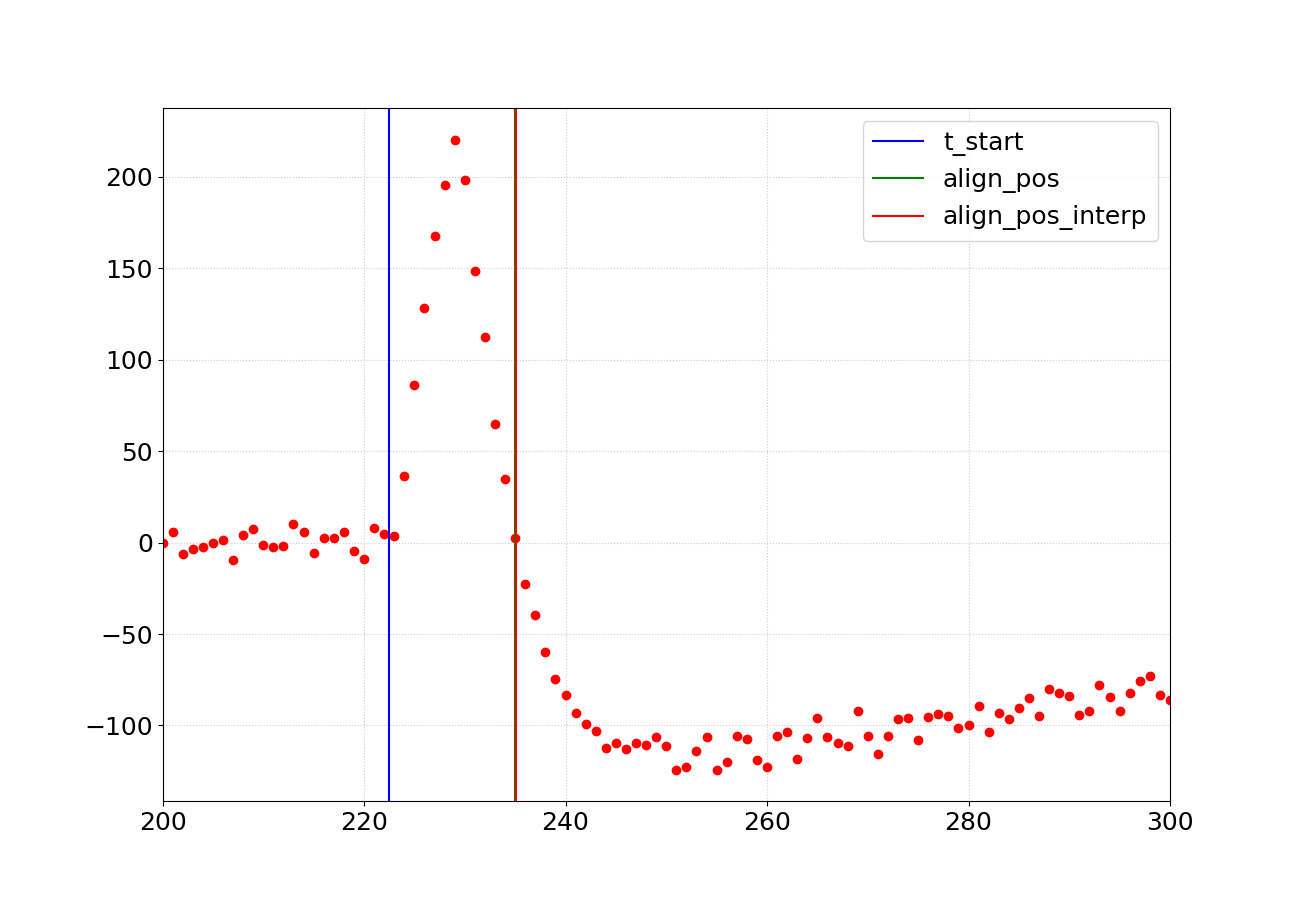

In [41]:
plt.figure()

plt.plot(ev_CFD, 'ro')


plt.axvline(ev_times[0], label='t_start', color='b')
plt.axvline(ev_times[3], label='align_pos', color='green')
plt.axvline(ev_times[4], label='align_pos_interp', color='red')
# plt.axvline(align_pos_interp, label='align_pos_interp 2', color='black')


plt.xlabel('')
plt.ylabel('')
# plt.yscale('log')
plt.xlim(200, 300)

plt.title('')
plt.legend()
plt.grid(color='#CCCCCC', linestyle=':')
#plt.savefig()
plt.show()

In [20]:
np.diff(np.sign([2,2,2,2,-2,2,-2]))

array([ 0,  0,  0, -2,  2, -2])